In [70]:
from funcs import *
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
n = 10
J = np.pi/4
g = np.pi/4
h=0.5
depth = 15
e_spectrum_no = 20

# Exact
circ_psi, peps_psi = generate_Kicked_Ising_peps(n, depth, J=J, g=g, h=h)
vec = exactly_contract_psi(circ_psi, depth).to_dense()
rho = partial_trace_vec(vec)
exact_e_spectrum = entanglement_spectrum(rho, e_spectrum_no)

# MPS
chi_list = [2,4,8]
mps_e_spectrum = {}
for chi in chi_list:
    amplitude_dict, amp_time = amplitudes(n, depth, chi, direction='xmin', J=J, g=g, h=h)
    vec = state_vector(amplitude_dict, n)
    rho = partial_trace_vec(vec)
    mps_e_spectrum[chi] = entanglement_spectrum(rho, e_spectrum_no)


100%|##########| 1024/1024 [00:00<00:00, 7622.22it/s]


Amplitudes computation time: 0.13 s, depth=15


100%|##########| 1024/1024 [00:00<00:00, 8010.07it/s]


Amplitudes computation time: 0.13 s, depth=15


100%|##########| 1024/1024 [00:00<00:00, 7687.69it/s]

Amplitudes computation time: 0.13 s, depth=15


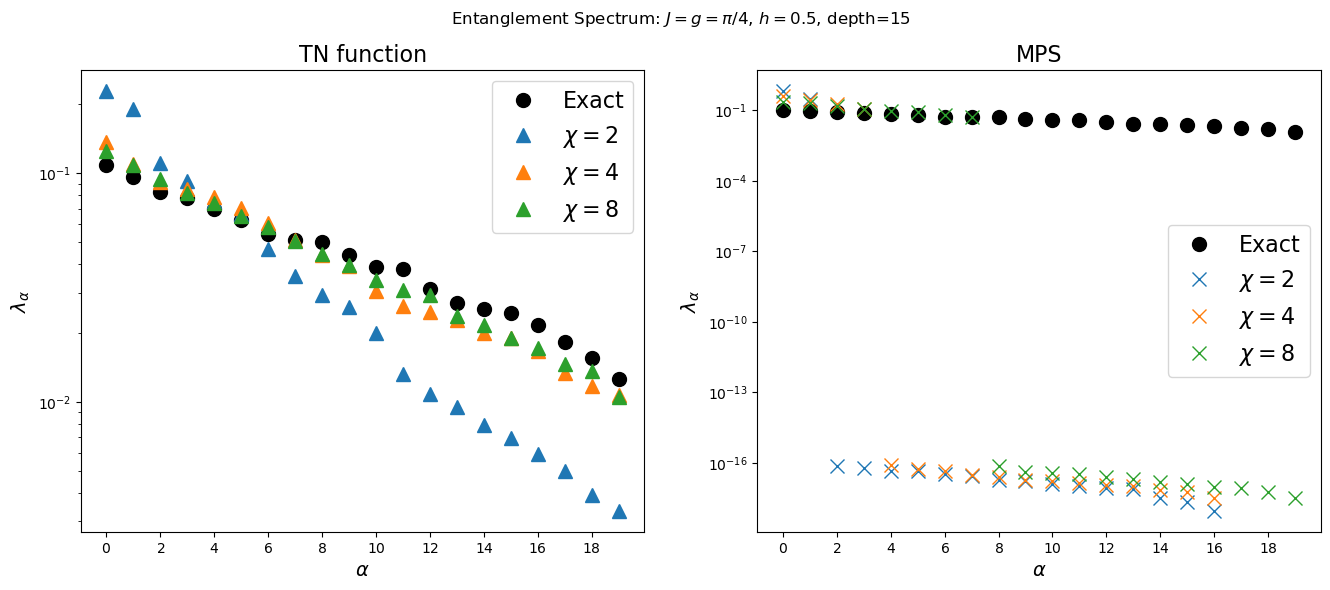

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].plot(exact_e_spectrum, label='Exact', color = 'black', linewidth=2, marker='o', linestyle='', markersize=10)
ax[1].plot(exact_e_spectrum, label='Exact', color = 'black', linewidth=2, marker='o', linestyle='', markersize=10)


# MPS plot
chi_list = [2,4,8]
for chi in chi_list:
    ax[1].plot(mps_e_spectrum[chi], label=f'$\chi={chi}$', linestyle='', marker='x', markersize=10)


# TN function
chi_list = [2,4,8]
for chi in chi_list:
    tnfunc_e_spectrum = np.load(f'./results/entanglement_spectrum/entanglement_spectrum_A_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.npy')
    ax[0].plot(tnfunc_e_spectrum, label=f'$\chi={chi}$', linestyle='', marker='^', markersize=10)
    
ax[0].set_title(f'TN function', fontsize=16)
ax[1].set_title(f'MPS', fontsize=16)
for ax_ in ax:
    ax_.set_xlabel(r'$\alpha$', fontsize=14)
    ax_.set_xticks(range(e_spectrum_no)[::2])
    ax_.set_xticklabels([f'${i}$' for i in range(e_spectrum_no)[::2]])
    ax_.set_ylabel(r'$\lambda_\alpha$', fontsize=14)
    ax_.set_yscale('log')
    ax_.legend(fontsize=16)

plt.suptitle(f'Entanglement Spectrum: $J=g=\pi/4$, $h={h}$, depth={depth}', fontsize=12)
plt.show()


In [107]:
from funcs import *
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
n = 10
J = np.pi/4
g = np.pi/4
h=0.5
depth = 15
e_spectrum_no = 40

# Exact
circ_psi, peps_psi = generate_Kicked_Ising_peps(n, depth, J=J, g=g, h=h)
vec = exactly_contract_psi(circ_psi, depth).to_dense()
rho = partial_trace_vec(vec)
exact_e_spectrum = entanglement_spectrum(rho, e_spectrum_no)

# MPS
chi_list = [2,4,8,32]
mps_e_spectrum = {}
for chi in chi_list:
    amplitude_dict, amp_time = amplitudes(n, depth, chi, direction='xmin', J=J, g=g, h=h)
    vec = state_vector(amplitude_dict, n)
    rho = partial_trace_vec(vec)
    mps_e_spectrum[chi] = entanglement_spectrum(rho, e_spectrum_no)


100%|##########| 1024/1024 [00:00<00:00, 14986.71it/s]


Amplitudes computation time: 0.07 s, depth=15


100%|##########| 1024/1024 [00:00<00:00, 15581.69it/s]


Amplitudes computation time: 0.07 s, depth=15


100%|##########| 1024/1024 [00:00<00:00, 14420.97it/s]


Amplitudes computation time: 0.07 s, depth=15


100%|##########| 1024/1024 [00:00<00:00, 12295.12it/s]

Amplitudes computation time: 0.08 s, depth=15


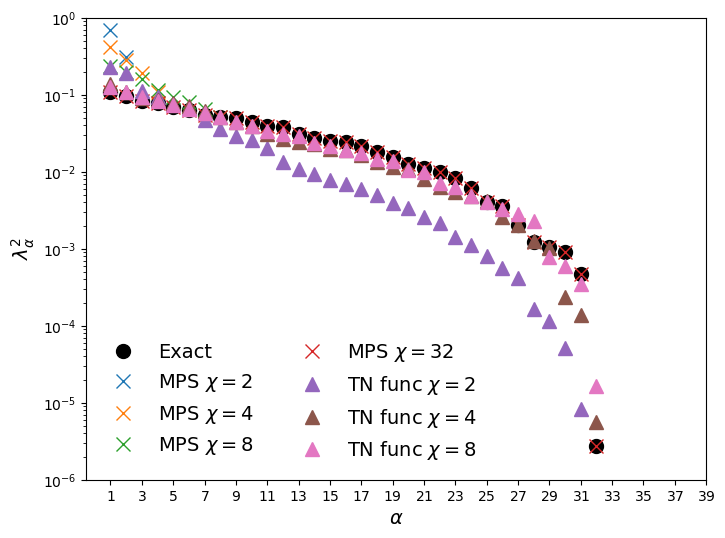

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(exact_e_spectrum, label='Exact', color = 'black', linewidth=2, marker='o', linestyle='', markersize=10)
# ax[1].plot(exact_e_spectrum, label='Exact', color = 'black', linewidth=2, marker='o', linestyle='', markersize=10)

# save as txt file
np.savetxt(f'./results/entanglement_spectrum/exact_espectrum_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.txt', exact_e_spectrum)


# MPS plot
chi_list = [2,4,8,32]
for chi in chi_list:
    ax.plot(mps_e_spectrum[chi], label=f'MPS $\chi={chi}$', linestyle='', marker='x', markersize=10)
    # ax[1].plot(mps_e_spectrum[chi], label=f'MPS $\chi={chi}$', linestyle='', marker='x', markersize=10)
    np.savetxt(f'./results/entanglement_spectrum/mps_espectrum_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.txt', mps_e_spectrum[chi])


# TN function
chi_list = [2,4,8]
for chi in chi_list:
    tnfunc_e_spectrum = np.load(f'./results/entanglement_spectrum/entanglement_spectrum_A_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.npy')
    # tnfunc_e_spectrum = np.load(f'./results/entanglement_spectrum/entanglement_spectrum_A_inverse_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.npy')
    ax.plot(tnfunc_e_spectrum, label=f'TN func $\chi={chi}$', linestyle='', marker='^', markersize=10)
    np.savetxt(f'./results/entanglement_spectrum/tnfunc_espectrum_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={chi}.txt', tnfunc_e_spectrum)
    
# ax.set_title(f'TN function', fontsize=16)
# ax[1].set_title(f'MPS', fontsize=16)
for ax_ in [ax]:
    ax_.set_xlabel(r'$\alpha$', fontsize=14)
    ax_.set_xticks(range(e_spectrum_no)[::2])
    ax_.set_xticklabels([f'${i+1}$' for i in range(e_spectrum_no)[::2]])
    ax_.set_ylabel(r'$\lambda_\alpha^2$', fontsize=14)
    ax_.set_ylim(1e-6,1)
    ax_.set_yscale('log')
    ax_.legend(fontsize=14, ncol=2, frameon=False)

# plt.suptitle(f'Entanglement Spectrum: $J={J},g={g},h={h}$, depth={depth}', fontsize=12)
plt.savefig(f'./results/ee_spectrum_n=10_2.pdf', bbox_inches='tight',dpi=300)
plt.show()
